In [1]:
import numpy as np
from sklearn.cluster import KMeans

#데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [6, 5],
    [7, 5],
    [2, 5],
    [9, 2],
    [6, 3],
    [2, 5]
])

In [5]:
from sklearn.metrics import accuracy_score

y_data = np.array([1, 1, 2, 0, 0, 2, 1, 0, 2])

model = KMeans(n_clusters=3, random_state=4)
model.fit(x_data)

print(model.labels_)
print("정확도 : {:.2f}".format(accuracy_score(y_data, model.labels_)))

[1 1 2 0 0 2 0 0 2]
정확도 : 0.89


In [6]:
import pandas as pd

x_data = pd.DataFrame(x_data, columns=['x', 'y'])
print(x_data)
x_data['cluster']=model.labels_
print(x_data)

   x  y
0  2  1
1  3  2
2  3  4
3  6  5
4  7  5
5  2  5
6  9  2
7  6  3
8  2  5
   x  y  cluster
0  2  1        1
1  3  2        1
2  3  4        2
3  6  5        0
4  7  5        0
5  2  5        2
6  9  2        0
7  6  3        0
8  2  5        2


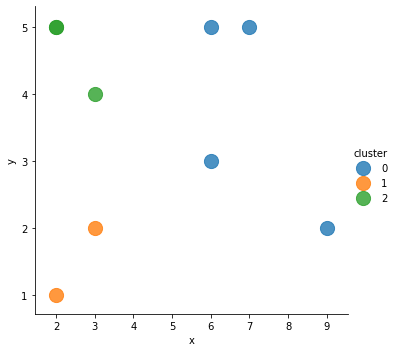

In [8]:
import seaborn as sns
sns.lmplot('x', 'y', data=x_data, fit_reg=False, scatter_kws={"s":200}, hue="cluster")

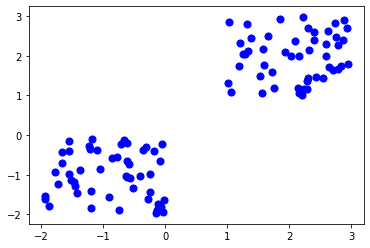

In [17]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

np.random.seed(42)
X= -2 * np.random.rand(100,2)
X1 = 1+2*np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s=50, c='b')
plt.show()

In [16]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

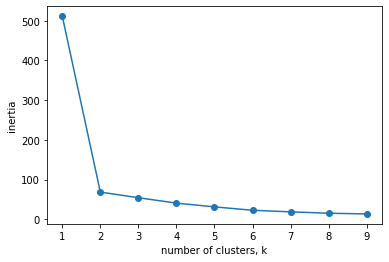

In [18]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(X)
    inertias.append(model.inertia_)
#inertia 는 SSE(Sum of Squared Error)
    
# Plot ks vs inertias

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [19]:
Kmean.cluster_centers_


array([[ 1.96321857,  2.09600786],
       [-1.04966875, -0.9269976 ]])

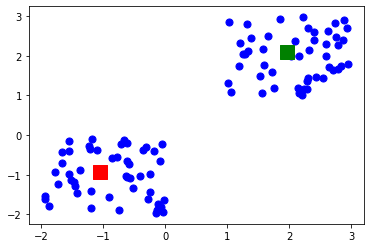

In [23]:
plt.scatter(X[ : , 0], X[ : , 1], s = 50, c='b')
plt.scatter(1.96321857, 2.09600786, s=200, c='g', marker='s')
#s는 크기
plt.scatter(-1.04966875, -0.9269976, s=200, c='r', marker='s')
plt.show()

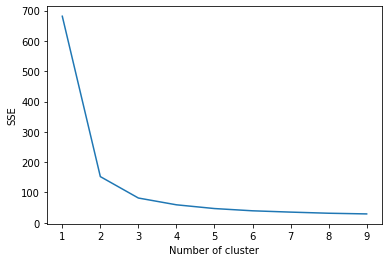

In [34]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris= load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters = n_cluster, random_state=4).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.4301335101366371
For n_clusters=3, The Silhouette Coefficient is 0.3644277911034431
For n_clusters=4, The Silhouette Coefficient is 0.368355999702495
For n_clusters=5, The Silhouette Coefficient is 0.46126149687493456
For n_clusters=6, The Silhouette Coefficient is 0.3458124796504538
For n_clusters=7, The Silhouette Coefficient is 0.32112841496399824
For n_clusters=8, The Silhouette Coefficient is 0.32198313910911786
For n_clusters=9, The Silhouette Coefficient is 0.3191569181257635
For n_clusters=10, The Silhouette Coefficient is 0.29924956335912933
